## Introduction  
Explore how to implement two important applications of PCA.

The first application illustrates how you can use PCA to project 2-D data onto its principal axes, meaning the two orthogonal directions that explain most of the variance in your data.

For the second application, you will use PCA to project higher dimensional data down to a lower dimensional feature space. This is an example of dimension reduction, a powerful technique that has multiple benefits, including reducing your model-building computational load and, in many cases, the accuracy of your model. PCA can help you filter out redundant, linearly correlated variables and reduce the amount of noise in your data.

## Part I: Using PCA to project 2-D data onto its principal axes

The projection of the data onto the two orthogonal directions that explain most of the variance in the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Create dataset

create a 2-dimensional dataset containing two linearly correlated features.

Use a bivariate normal distribution.

Both features, X1 and X2, will have zero mean and a covariance given by the (symmetric) covariance matrix:

 
\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

Here, the diagonal elements define the variances of X1 and X2 (3 and 2, respectively), while the off-diagonal element is the covariance (2) between X1 and X2, which expresses how similarly these features vary.

In [7]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

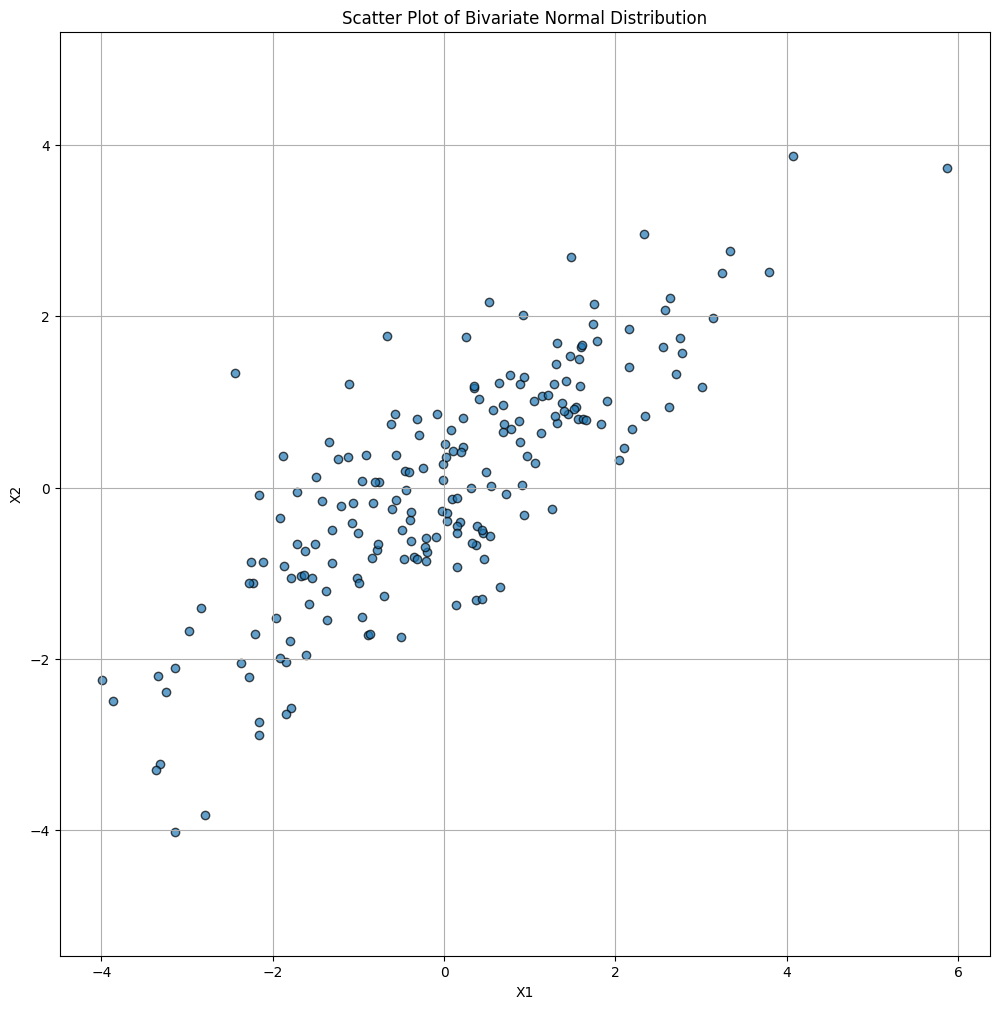

In [11]:
# Visualize the relationship between the two features
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[:, 1],  edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

In [12]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[-1.04842083e+00, -1.06980963e-01],
       [-1.36011135e+00,  9.96147017e-01],
       [ 5.11856490e-01, -1.85703592e-01],
       [-3.35443240e+00,  5.15279173e-01],
       [ 1.01944843e+00,  3.23656540e-01],
       [ 9.99993608e-01, -3.43827870e-01],
       [-5.15830396e-01, -1.28757105e+00],
       [ 3.69352656e+00, -4.34071204e-01],
       [ 2.17840683e+00,  1.61153249e-01],
       [ 1.94340877e+00, -9.79848064e-01],
       [-3.11831842e+00, -1.44716110e-01],
       [-1.40136620e-01, -9.67741347e-01],
       [ 1.17663747e+00,  3.62976233e-02],
       [ 2.47387460e+00,  1.98959524e-01],
       [ 1.29417872e+00, -2.31456758e-01],
       [ 1.31032255e+00,  1.18809169e+00],
       [ 3.52808486e-02, -7.26407847e-01],
       [-1.75129025e+00, -8.16984783e-01],
       [-4.45442262e-01, -1.31897712e+00],
       [ 2.85114418e+00,  7.68521862e-02],
       [-1.56272391e+00,  1.03075622e-01],
       [ 2.58334834e-01, -2.27572148e-01],
       [ 3.16628576e+00, -5.33254004e-01],
       [ 1.

### Get the principal components from the model.
The principal components are the principal axes, represented in feature space coordinates, which align with the directions of maximum variance in your data.

In [13]:
# Get the principal components
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [15]:
# Calculate the explained variance ratio
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

The first component explains over 90% of the variance in the data, while the second explains about 9%

### Display the results


Use a scatterplot to display the data points in their original feature space, X1, X2.

Also plot the projections of the data points onto their principal component directions.

Project the data onto its principal component axes
The projection of the data onto a given principal component yields the coordinates of each of the data points along that component's direction.

The new coordinates are given by the dot products of each point's coordinates with the given PCA component.

Specifically, the projections are given by:



In [18]:
# Project the data onto its principal component axes
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

Now each projection_pc1[i] is how much the i-th data point extends along PC1. Now that you have these coordinates, you can use them to represent the projections of each data point along the principal directions in the original feature space.

In [19]:
# Project the data onto its principal component axes
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

Basically, you're reconstructing how the data projects onto the original X-Y space, along each component direction.

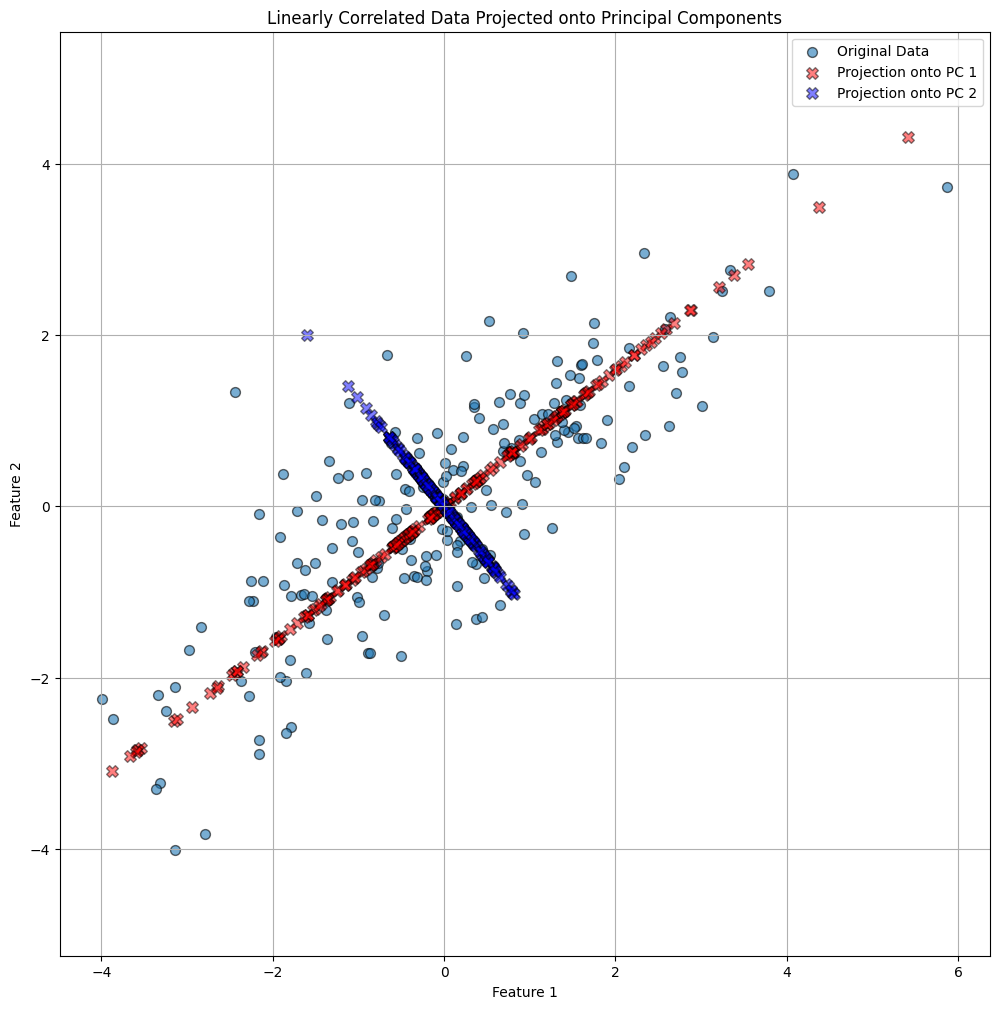

In [22]:
# Plot original data
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

The data varies in two main directions.

The first direction, in red, is aligned in the direction having the widest variation. The second direction, in blue, is perpendicular to first and has a lower variance.

## PCA for feature space dimensionality reduction
For this second application, you'll use PCA to project the four-dimensional Iris feature data set down onto a two-dimensional feature space.

This will have the added benefit of enabling you to visualize some of the most important structures in the dataset.

#### Load and preprocess Iris data


In [23]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Initialize a PCA model and reduce the Iris data set dimensionality to two components

In [24]:
# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

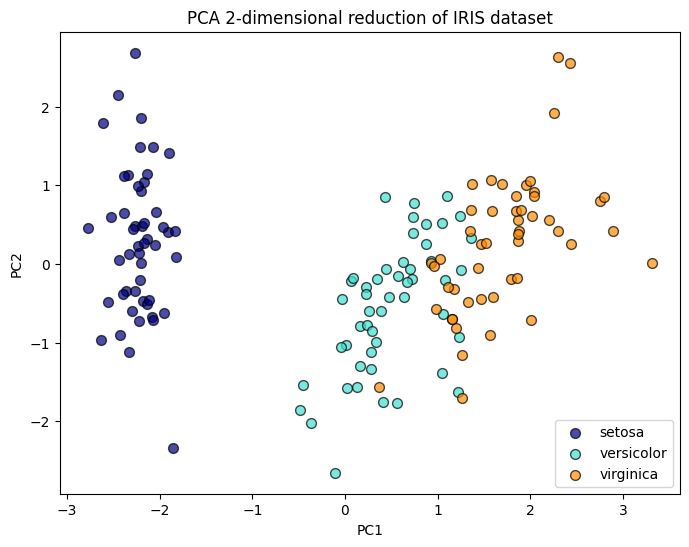

In [25]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [29]:
# What percentage of the original feature space variance do these two combined principal components explain?
100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000164)

#### A deeper look at the explained variances
In this next and final set of exercises, the goal is to:

Acquire and plot the PCA-explained variance ratios for all four Iris features as a barplot  
Overlay the cummulative explained variance

#### Reinitialize the PCA model without reducing the dimension


In [30]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

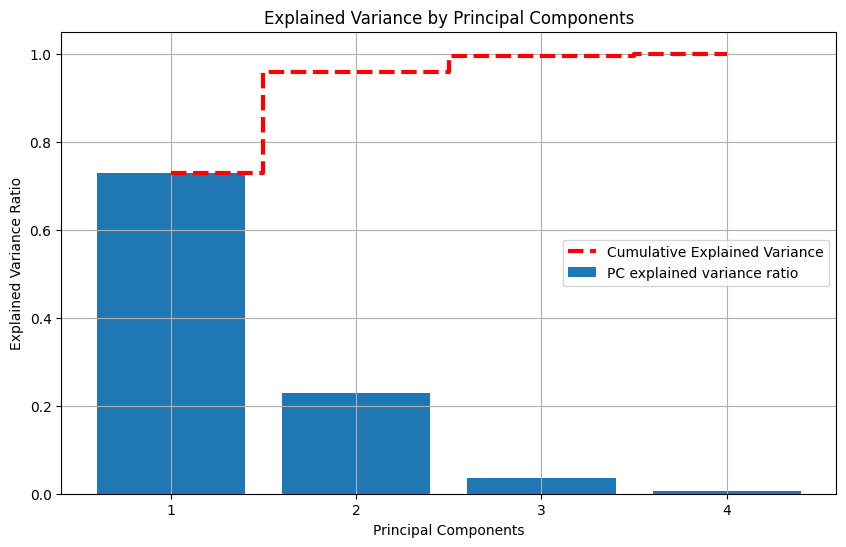

In [31]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()